## Exploratory Data Analysis in Python Part 1

First meeting 02/01/2019 to discuss the basics of how the ML team meetups and Kaggle competition will work. 

We first took a basic look at the data following code in R that Steven was writing to get a feel for the data. Here I am writing the same basic analysis in Python and making a few additional plots. This code should work in the Kaggle Kernel as well. 

In [1]:
# First import the appropriate libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Take a look at the data we have available in the input directory
print(os.listdir('../input/'))

['test_images', 'breed_labels.csv', '.DS_Store', 'test', 'train_images.zip', 'train_metadata', 'color_labels.csv', 'test_sentiment', 'test_metadata', 'train_sentiment', 'train', 'train_images', 'state_labels.csv']


In [3]:
# Read in the label and training data
states = pd.read_csv('../input/state_labels.csv')
colors = pd.read_csv('../input/color_labels.csv')
breeds = pd.read_csv('../input/breed_labels.csv')
train = pd.read_csv('../input/train/train.csv')

In [4]:
# Check out the contents
print("State Labels")
states.head()

State Labels


,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


In [5]:
print("Color Labels")
colors.head()

Color Labels


,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [6]:
print("Breed Labels")
breeds.head()

Breed Labels


,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [7]:
print("Training Data")
train.head()

Training Data


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [8]:
# Look at summary statistics of training data
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [9]:
# Variables we can look at from column names
var_name = list(train.columns)

# Data type of each based on first entry
data_type = train.dtypes

num_unique = pd.Series({x: len(train.loc[:,x].unique()) for x in var_name})

# Get summary stats from the describe table
min_val = train.describe().loc["mean", :]
max_val = train.describe().loc["max", :]

# Get median via function to return NaN for non-numeric objects
def get_median(x, df, dtype):
    if dtype[x] != 'object':
        return df.loc[:,x].median()
    else:
        return np.NaN
    
med_val = pd.Series({x: get_median(x,train,data_type) for x in var_name})

# Get number of missing values
num_missing = pd.Series({x: train.loc[:,x].isnull().sum() for x in var_name})


# Create a new data frame with some descriptive measures by merging these series
desc_measures = pd.DataFrame({
    "data_type": data_type,
    "num_unique": num_unique,
    "min": min_val,
    "max": max_val,
    "med": med_val,
    "num_missing": num_missing
}, index=var_name)

# Check contents
desc_measures

,data_type,num_unique,min,max,med,num_missing
Type,int64,2,1.457614,2.0,1.0,0
Name,object,9061,NaN,NaN,NaN,1257
Age,int64,106,10.452078,255.0,3.0,0
Breed1,int64,176,265.272594,307.0,266.0,0
Breed2,int64,135,74.009738,307.0,0.0,0
Gender,int64,3,1.776162,3.0,2.0,0
Color1,int64,7,2.234176,7.0,2.0,0
Color2,int64,7,3.222837,7.0,2.0,0
Color3,int64,6,1.882012,7.0,0.0,0
MaturitySize,int64,4,1.862002,4.0,2.0,0


Text(0,0.5,'Animals Adopted')

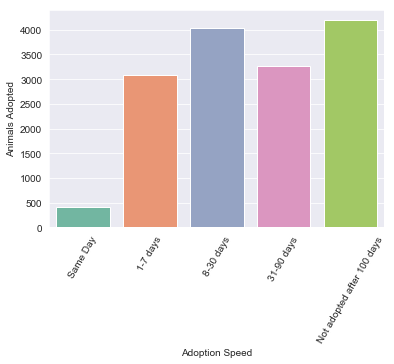

In [10]:
# Now to plot the number of animals being adopted based on categories of speed
sns.set_style('darkgrid')
ax = sns.countplot(train.AdoptionSpeed, palette='Set2')
ax.set_xticklabels(labels=("Same Day", 
                           "1-7 days", 
                           "8-30 days", 
                           "31-90 days", 
                           "Not adopted after 100 days"), rotation=60)
ax.set_xlabel("Adoption Speed")
ax.set_ylabel("Animals Adopted")

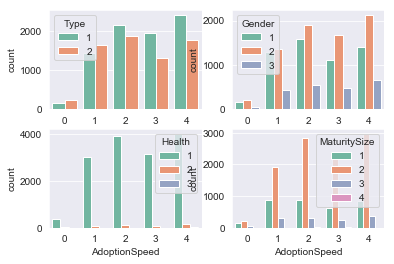

In [11]:
# Split the plot into categories, is there one category that is being adopted faster/slower than others?
# First check out the categories with only a few unique options 
fig, ax = plt.subplots(2,2)
sns.countplot(x="AdoptionSpeed", hue="Type", data=train, ax=ax[0,0], palette='Set2')
sns.countplot(x="AdoptionSpeed", hue="Gender", data=train, ax=ax[0,1], palette='Set2')
sns.countplot(x="AdoptionSpeed", hue="Health", data=train, ax=ax[1,0], palette='Set2')
sns.countplot(x="AdoptionSpeed", hue="MaturitySize", data=train, ax=ax[1,1], palette='Set2')

In [12]:
# Will pick up from here next week